# Data_Cleaning

### Import Pandas

In [290]:
import pandas as pd

### Series datatype && mean,median,mode

In [291]:
sr=pd.Series([1,4,6,7,8,7,8])
print(sr.mean())
print(sr.median())
print(sr.mode().values)

5.857142857142857
7.0
[7 8]


### reading csv

In [292]:
df = pd.read_csv(".\\Dataset\\play_store.csv")

In [293]:
print(df.shape)
print(len(df))
df.head(2)

(10841, 13)
10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### summary of datatype && non-null value

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### summary of Statistics

In [295]:
df.describe() #0-5

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### exploring null value with bool d-type

In [296]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [297]:
df.isnull().sum()  #in summation

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Rename column_name

In [298]:
"""
rename column name - methode_1
df.columns
df["Andrd Version"] = df["Android Ver"]
df.drop("Android Ver",axis=1,inplace=True)"""

#rename column name - methode_2
df.rename(columns={"Current Ver":"Current Version","Android Ver":"Android Version"},inplace=True)
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### feeding null values using rest of data

In [299]:
df["Rating"].fillna(df["Rating"].median(),inplace=True)
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               1
Price              0
Content Rating     1
Genres             0
Last Updated       0
Current Version    8
Android Version    3
dtype: int64

In [300]:
#df["Current Version"].mode()
df["Type"].fillna(df["Type"].mode()[0],inplace=True)
df["Content Rating"].fillna(df["Content Rating"].mode()[0],inplace=True)
df["Current Version"].fillna(df["Current Version"].mode()[0],inplace=True)
df["Android Version"].fillna(df["Android Version"].mode()[0],inplace=True)
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Version    0
Android Version    0
dtype: int64

### Purifing of float values

In [301]:
df["Reviews"] = pd.to_numeric(df["Reviews"],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           10841 non-null  float64
 3   Reviews          10840 non-null  float64
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10841 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10841 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Version  10841 non-null  object 
 12  Android Version  10841 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [302]:
def purify(inp):
    new=[]
    for i in inp:
        el=str(i).replace("M","")
        el=el.replace("k","")
        el=el.replace("$","")
        el=el.replace("+","")
        el=el.replace(",","")
        new.append(el)
    #print(len(new))
    return new

In [303]:
###############
df["Size"] = purify(df["Size"])
df["Size"] = pd.to_numeric(df["Size"],errors='coerce')
df["Size"].fillna(df["Size"].median(),inplace=True)  # filling once again for nan value
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            1
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Version    0
Android Version    0
dtype: int64

In [304]:
df["Price"] = purify(df["Price"])
df["Price"] = pd.to_numeric(df["Price"],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           10841 non-null  float64
 3   Reviews          10840 non-null  float64
 4   Size             10841 non-null  float64
 5   Installs         10841 non-null  object 
 6   Type             10841 non-null  object 
 7   Price            10840 non-null  float64
 8   Content Rating   10841 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Version  10841 non-null  object 
 12  Android Version  10841 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [305]:
df["Installs"] = purify(df["Installs"])
df["Installs"] = pd.to_numeric(df["Installs"],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           10841 non-null  float64
 3   Reviews          10840 non-null  float64
 4   Size             10841 non-null  float64
 5   Installs         10840 non-null  float64
 6   Type             10841 non-null  object 
 7   Price            10840 non-null  float64
 8   Content Rating   10841 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Version  10841 non-null  object 
 12  Android Version  10841 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


### rectify outlayers && removing

In [306]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084000e+04,10841.000000,1.084000e+04,10840.000000
mean,4.207841,4.441529e+05,33.679006,1.546434e+07,1.027368
std,0.500893,2.927761e+06,91.633465,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,28.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [307]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1000.0,NaN,0,NaN,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [308]:
df.drop([10472],inplace=True)
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,33.589862,1.546434e+07,1.027368
std,0.480342,2.927761e+06,91.166381,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,28.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [309]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [310]:
print(df.isnull().sum(),"\n\n")
df.info()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Version    0
Android Version    0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10840 non-null  object 
 1   Category         10840 non-null  object 
 2   Rating           10840 non-null  float64
 3   Reviews          10840 non-null  float64
 4   Size             10840 non-null  float64
 5   Installs         10840 non-null  float64
 6   Type             10840 non-null  object 
 7   Price            10840 non-null  float64
 8   Content Rating   10840 non-null  object 
 9   Genres           10840 non-null  object 
 10  Last Updated     10840 non-null  object 
 11 

# Visualization

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Installs'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

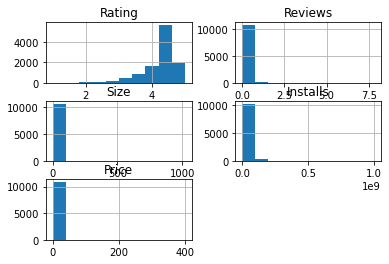

In [311]:
df.hist()

<AxesSubplot:>

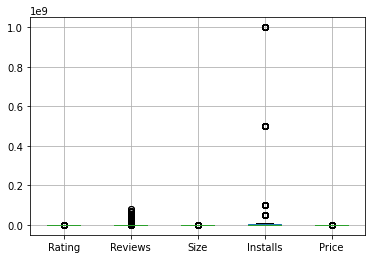

In [312]:
df.boxplot()